<a href="https://colab.research.google.com/github/MuskanSharma-22CSU123/LabManual_DeepLearning/blob/main/DL_EXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT


- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit.
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**



<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Thermometer_CF.svg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Convert Celsius to Fahrenheit [Image Source: https://commons.wikimedia.org/wiki/File:Thermometer_CF.svg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASETS

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# You have to include the full link to the csv file containing your dataset
Temperature_df = pd.read_csv('/content/02_Celsius to Fahrenheit.csv')
Temperature_df.reset_index(drop=True, inplace=True)

In [ ]:
Temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [ ]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
Temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [ ]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# STEP #2: VISUALIZE DATASET

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

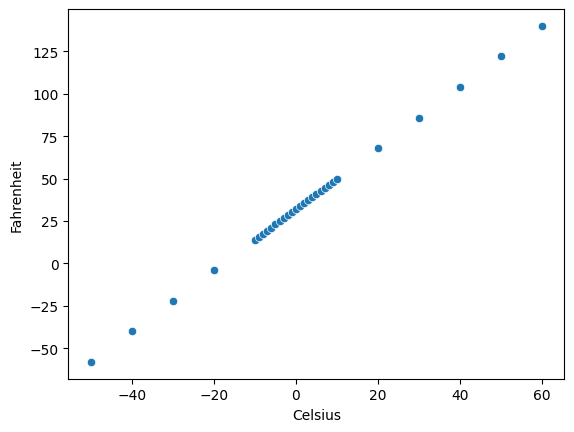

In [ ]:
sns.scatterplot(x=Temperature_df['Celsius'], y=Temperature_df['Fahrenheit'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [ ]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']

# STEP#4: BUILD AND TRAIN THE MODEL

In [ ]:
X_train.shape

(30,)

In [ ]:
y_train.shape

(30,)

This will model a simple linear equation.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step - loss: 2100.0947
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 1452.6564
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1068.0022
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 923.4713
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 952.4648
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1046.2057
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1105.7855
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1091.2675
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1013.9368
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 905.9981
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 800.1583
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 720.0443
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 676.1263
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 665.0621
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/st

# STEP#5: EVALUATING THE MODEL

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

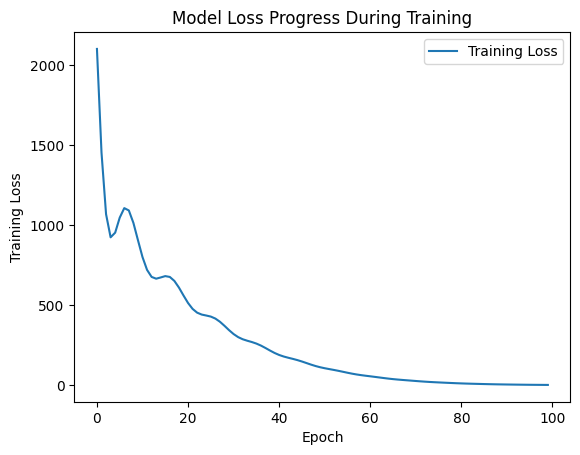

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[1.799564]], dtype=float32), array([30.829924], dtype=float32)]

In [ ]:
# Use the trained model to perform predictions

Temp_C = np.array([0])
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Temperature in degF Using Trained ANN = [[30.829924]]


In [ ]:
# Let's confirm this Using the equation:
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = [32.]


# EXCELLENT JOB & CONGRATULATIONS! NOW YOU HAVE BUILT YOUR FIRST NEURAL NETWORK MODEL USING TENSORFLOW 2.0 IN GOOGLE COLAB!